### 1. Sierpinski Triangles

Write a recursive function with exactly three parameters that generates a visualization of a Sierpinski triangle.  Your function should start like this:
```
def Sierpinski(v, depth, start_color):
```
Where v is a numpy array of three vertices, depth is the depth of the recursion, start_color is the starting color.  
When depth = 1, a single triangle with vertices given by v, in color start_color should be shown.
Use the sample program nested polygons as a starting point – you will want to re-use the drawPolygon function and perhaps the midpoint function.

Here’s some pseudo-code:
```
if depth == 1:
        draw a single triangle with vertices given by v
if depth > 1:
     draw three Sierpinski Triangles, with recursion-depth (depth-1)
        with 3 vertices given by this triple for each of the 
            three vertices v_0,v_1,v_2
                v_i together with the two midpoints of the line segments joining v_i and the two other vertices
```

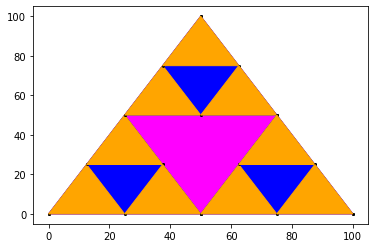

In [5]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure()
color_list = ['magenta', 'blue', 'orange', 'cyan']  # Put your color scheme in this list.  This is a global variable

def next_color(acolor):
    k = color_list.index(acolor)
    return color_list[(k+1)%len(color_list)]

    
def drawPoly(vert, my_color):
    # Draw a colored polygon with vertices given by the list vert
    plt.scatter(vert[:, 0], vert[:, 1], s = 3, color = 'black')  # Plot the verticis
    interior = plt.Polygon(vert, color = my_color)
    plt.gca().add_patch(interior)
    

def midpoint(p1, p2):
    answer = [(p1[0]+p2[0])/2 , (p1[1]+p2[1])/2]
    return answer
    
def sierpinski(v, depth, my_color):
    
    drawPoly(v, my_color)
    
    if depth > 1:
        #3 vertices
        v_0 = v[0]
        v_1 = v[1]
        v_2 = v[2]
        #3 midpoints
        midpoint_01 = [(v_0[0]+ v_1[0])/2,(v_0[1] + v_1[1])/2]
        midpoint_02 = [(v_0[0]+ v_2[0])/2,(v_0[1] + v_2[1])/2]
        midpoint_12 = [(v_1[0]+ v_2[0])/2,(v_1[1] + v_2[1])/2]
        #joining vertex with two other vertices
        join_v0 = np.array([v_0, midpoint_01, midpoint_02])
        join_v1 = np.array([midpoint_01, v_1, midpoint_12])
        join_v2 = np.array([midpoint_02, midpoint_12, v_2])
        
        sierpinski(join_v0, depth-1, next_color(my_color))
        sierpinski(join_v1, depth-1, next_color(my_color))
        sierpinski(join_v2, depth-1, next_color(my_color))

         
if __name__ == '__main__':
    v = np.array([[0, 0], [50,100], [100,0]])
    sierpinski(v, 3, color_list[0])
    #drawPoly(v, 'magenta')
    plt.show()

### 2.  Complete the implementation of the Item class.  
You may NOT modify the testing code in the `if __name__ == '__main__':` block.  A correct implementation of Item should provide this output with my testing code.  You may want to write more testing code.
```
my_item: Item with weight: 0.34567kg and value: $5.25
your_item: Item with weight: 0kg and value: $0.00
book: Item with weight: 5kg and value: $20.00
hat: Item with weight: 5kg and value: $20.00
book == hat :  True
book: Item with weight: 8kg and value: $20.00
hat: Item with weight: 5kg and value: $20.00
book == hat : False
book < hat : False
 Item with weight: 13kg and value: $15.00
 Item with weight: 6kg and value: $4.00
 Item with weight: 4kg and value: $12.00
 Item with weight: 12kg and value: $8.00
 Item with weight: 8kg and value: $16.00
 Item with weight: 3kg and value: $4.00
 Item with weight: 0kg and value: $0.00
SORTED
 Item with weight: 0kg and value: $0.00
 Item with weight: 6kg and value: $4.00
 Item with weight: 3kg and value: $4.00
 Item with weight: 12kg and value: $8.00
 Item with weight: 4kg and value: $12.00
 Item with weight: 13kg and value: $15.00
 Item with weight: 8kg and value: $16.00
bh: Item with weight: 13kg and value: $40.00
shoppingBag: Item with weight: 46kg and value: $59.00
```


In [12]:
# The Item class, for items in the knapsack
# Complete the implementation so that the output is correct.

class Item:
    def __init__(self, weight = 0, value = 0):
        self.weight = weight
        self.value = float(value)


    def __str__(self):
        return f'Item with weight: {self.weight}kg and value: ${self.value:.2f}'


    def __eq__(self, other):
        
        if self.value  == other.value and self.weight == other.weight:
            return True
        else:
            return False

    def __lt__(self, other):
        
        if self.value < other.value:
            return True
        else:
            return False
        
        # Compare based on value only
        # Return True exacly when the value of self is less than the value of other
        

    def __add__(self, other):
        #  Add both the weights and the values and create a new bigger Item
        bigger_item = Item((self.weight+other.weight), (self.value+other.value))
        return bigger_item
        #pass
        
        
if __name__ == '__main__':
    # Testing code
    my_item = Item(0.34567, 5.25)
    your_item = Item()
    print(f'my_item:{my_item}')
    print(f'your_item:{your_item}')
    
    book = Item(5, 20)
    hat = Item(5, 20)
    print(f'book:{book}')
    print(f'hat:{hat}')
    print("book == hat : ", book == hat)
    book.weight += 3
    print(f'book:{book}')
    print('hat:{}'.format(hat))
    print(f'book == hat : {book == hat}')
    print(f'book < hat : {book < hat}')
    itemList = [Item(13, 15), Item(6, 4), Item(4, 12), Item(12, 8), Item(8, 16), Item(3, 4), Item()]
    for item in itemList:
        print(item)
    itemList.sort()
    print('SORTED')
    for item in itemList:
        print(item)
    bh = book + hat
    print(f'bh:{bh}')
    shoppingBag = sum(itemList, Item())
    print(f'shoppingBag:{shoppingBag}')

my_item:Item with weight: 0.34567kg and value: $5.25
your_item:Item with weight: 0kg and value: $0.00
book:Item with weight: 5kg and value: $20.00
hat:Item with weight: 5kg and value: $20.00
book == hat :  True
book:Item with weight: 8kg and value: $20.00
hat:Item with weight: 5kg and value: $20.00
book == hat : False
book < hat : False
Item with weight: 13kg and value: $15.00
Item with weight: 6kg and value: $4.00
Item with weight: 4kg and value: $12.00
Item with weight: 12kg and value: $8.00
Item with weight: 8kg and value: $16.00
Item with weight: 3kg and value: $4.00
Item with weight: 0kg and value: $0.00
SORTED
Item with weight: 0kg and value: $0.00
Item with weight: 6kg and value: $4.00
Item with weight: 3kg and value: $4.00
Item with weight: 12kg and value: $8.00
Item with weight: 4kg and value: $12.00
Item with weight: 13kg and value: $15.00
Item with weight: 8kg and value: $16.00
bh:Item with weight: 13kg and value: $40.00
shoppingBag:Item with weight: 46kg and value: $59.00


### 3.  Fibonacci Numbers and comparing execution times

Write two different implementations for a function to compute the nth fibonacci number.  One function should be recursive, implementing this definition:
```
fib(n) = 1 if n == 1 or n == 2
fib(n) = fib(n-1) + fib(n-2)  if n > 2

```

Your second implementation should use a loop and no recursion and be as efficient as you can make it.  This means no repreated computations.

Measure the running time of each of your functions on inputs n = 1 to 20.  The plot a graph of the execution time of each of your functions (the horizontal axis is the numbers n = 1..20 and the vertical axis is the running time in micro seconds.  Make your plot easy to understand with labels on the axes and a legend.  You may use `time.perf_counter()`you measure the elapsed time of your code, and store the results in a numpy array.  Look at zybook chapter 12 for help with formatting plots.



recFib(1) is 1
loopFib(1) is 1

recFib(2) is 1
loopFib(2) is 1

recFib(3) is 2
loopFib(3) is 2

recFib(4) is 3
loopFib(4) is 3

recFib(5) is 5
loopFib(5) is 5

recFib(6) is 8
loopFib(6) is 8

recFib(7) is 13
loopFib(7) is 13

recFib(8) is 21
loopFib(8) is 21

recFib(9) is 34
loopFib(9) is 34

recFib(10) is 55
loopFib(10) is 55

recFib(11) is 89
loopFib(11) is 89

recFib(12) is 144
loopFib(12) is 144

recFib(13) is 233
loopFib(13) is 233

recFib(14) is 377
loopFib(14) is 377

recFib(15) is 610
loopFib(15) is 610

recFib(16) is 987
loopFib(16) is 987

recFib(17) is 1597
loopFib(17) is 1597

recFib(18) is 2584
loopFib(18) is 2584

recFib(19) is 4181
loopFib(19) is 4181

recFib(20) is 6765
loopFib(20) is 6765





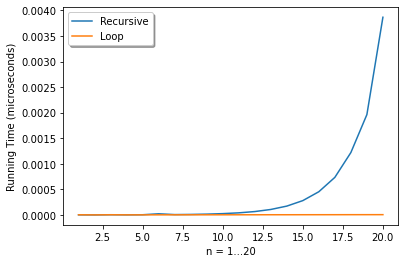

In [74]:
import time
import numpy as np 
import matplotlib.pyplot as plt

def recFib(n):
    if n < 0:
        return -1
    elif n == 0:
        return 0
    elif n == 1 or n == 2:
        return 1
    else:
        return recFib(n-1) + recFib(n-2)

def loopFib(n):
    fib_sequence = [0,1]
    if n ==0:
        return fib_sequence[0]
    if n > 2:
        for i in range(2,n+1):
            next_fib_num = fib_sequence[i-1] + fib_sequence[i-2]
            fib_sequence.append(next_fib_num)
    return fib_sequence[-1]
    

def experiment(func, input_param,  reps):
    pass

if __name__ == '__main__':
    #  Display values of both functions (recFib, loopFib) for k = 1 to 20
    for n in range(1,21):
        print(f'recFib({n}) is {recFib(n)}')
        print(f'loopFib({n}) is {loopFib(n)}')
        print()
    
    
    #  Compute the execution times for recFib on inputs k = 1 to 20
    rec_Fib_times = []
    for n in range(1,21):
        start_recFib = time.perf_counter()  
        rec_num = recFib(n)
        #print(f'recFib({n}) is {recFib(n)}')  
        end_recFib = time.perf_counter()
        elapsed_recFib = end_recFib - start_recFib
        #print(elapsed_recFib)
        rec_Fib_times.append(elapsed_recFib)
    #print(rec_Fib_times)
    #print(len(rec_Fib_times))
    print()
        
        #create np array to hold values
        
        
    #  Compute the execution times for loopFib on inputs k = 1 to 20
    loop_Fib_times = []
    for n in range(1,21):
        start_loopFib = time.perf_counter()  
        loop_num = loopFib(n)
        #print(f'loopFib({n}) is {loopFib(n)}')
        end_loopFib = time.perf_counter()
        elapsed_loopFib = end_loopFib - start_loopFib
        loop_Fib_times.append(elapsed_loopFib)
        #print(elapsed_loopFib)
    #print(loop_Fib_times)
    #print(len(loop_Fib_times))
    print()
    
    
    # Plot the execution times as a function of n = 1 to 20, both on the same axis.
    x = range(1,21)
    x2 = range(1,21)
    y = np.array(rec_Fib_times)
    y2 = np.array(loop_Fib_times)
    plt.xlabel('n = 1...20')
    plt.ylabel('Running Time (microseconds)')
    plt.plot(x,y, label='Recursive')
    plt.plot(x2,y2, label='Loop')
    plt.legend(shadow=True, loc='upper left')
    plt.show


    
    
    